# Plotting of Evaluation Results

*Here, use seaborn, which calculates a bootstrapped 95% CI, which looks nicer and more narrow than
with matplotlib*

You need to run `aggregator.py` first. Specify which results to aggregate in `settings.py`.

These are the results for running the algorithms on the large GTS CE network and collecting metrics 
every 100 time steps. 30% ingress nodes (config `hc_0.3+`).
Seems like `hc_0.3` is the same, but the decisions aren't recorded (also not needed here).

Goal: Show that they work on a very large network and lead to stable results.
In particular, the percentage of successful flows doesn't drop and the end-to-end delay doesn't increase over time.

## Definition of plotting functions & settings

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

result_dir = 'transformed_0-49_perc-flows'
# result_dir_bsp = '../3x3/transformed_bsp_150-199'
configs = ['hc_0.3+']
# configs = ['hc', 'lnc']
network = 'gts_ce_149.graphml'
# network = 'dfn_58.graphml'
metrics_file = 't-metrics.csv'

labels = ['GPASP', 'SPR2']

In [11]:
def plot_successful(df, labels):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.set(font_scale=1.2, style='white', rc={'lines.linewidth': 2})

    # successful_flows for the gts ce network
    df_successful = df[df['Metric'] == 'perc_successful_flows']
    print(df_successful['Algorithm'].unique())

    # *100 to convert to percent
    sns.lineplot(df_successful['Time'], df_successful['Value'], hue=df_successful['Algorithm'], ax=ax,
                 err_style='bars', err_kws={'capsize': 4},
                 style=df_successful['Algorithm'], markers=True, markersize=9, legend=False)

    ax.set_xlabel('Time')
    ax.set_ylabel('Successful Flows')
    # ax.set_ylim(0, 1.05)
    ax.tick_params(axis='both', direction='inout', length=5, bottom=True, left=True, right=True, top=True)
    plt.legend(labels=labels)

    plt.tight_layout()
    network_name = network.replace('.graphml', '')
    fig.savefig(f'plots/{network_name}_flows.pdf')

In [12]:
def plot_delay(df, labels):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.set(font_scale=1.2, style='white', rc={'lines.linewidth': 2})

    df_delay = df[df['Metric'] == 'avg_end2end_delay_of_processed_flows']
    print(df_delay['Algorithm'].unique())

    sns.lineplot(df_delay['Time'], df_delay['Value'], hue=df_delay['Algorithm'], ax=ax,
                 err_style='bars', err_kws={'capsize': 4},
                 style=df_delay['Algorithm'], markers=True, markersize=9, legend=False)

    ax.set_xlabel('Time')
    ax.set_ylabel('Avg. End-to-end Delay [ms]')
    ax.tick_params(axis='both', direction='inout', length=5, bottom=True, left=True, right=True, top=True)
    plt.legend(labels=labels)

    plt.tight_layout()
    network_name = network.replace('.graphml', '')
    fig.savefig(f'plots/{network_name}_delay.pdf')

## Plot results

### Successful flows

Config: hc_0.3+
['gpasp' 'spr2']


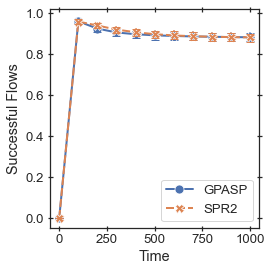

In [13]:
for config in configs:
    print(f"Config: {config}", flush=True)
    df = pd.read_csv(f'{result_dir}/{config}/{network}/flow/{metrics_file}',
                     names=['Time', 'Value', 'Metric', 'Algorithm'])
    # df = df.append(pd.read_csv(f'{result_dir_bsp}/{config}/{network}/flow/{metrics_file}',
    #                names=['Time', 'Value', 'Metric', 'Algorithm']))
    df = df[df['Algorithm'] != 'spr1']
    plot_successful(df, labels=labels)

### Delay

Config: hc_0.3+
['gpasp' 'spr2']


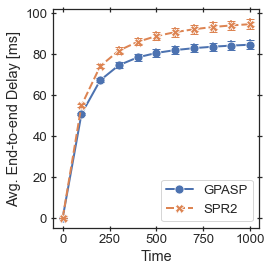

In [14]:
for config in configs:
    print(f"Config: {config}", flush=True)
    df = pd.read_csv(f'{result_dir}/{config}/{network}/delay/{metrics_file}',
                     names=['Time', 'Value', 'Metric', 'Algorithm'])
    # df = df.append(pd.read_csv(f'{result_dir_bsp}/{config}/{network}/delay/{metrics_file}',
    #                names=['Time', 'Value', 'Metric', 'Algorithm']))
    df = df[df['Algorithm'] != 'spr1']
    plot_delay(df, labels=labels)